In [20]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [27]:
import statsmodels.api as sm

In [21]:
case = pd.read_csv("C:/Users/Hannah Kim/Documents/_실증분석연구회/pre_01.csv")
case

,Date,market_sam,closing_sam,yesterday_sam,high_sam,low_sam,volume_sam,price_du,closing_sp,open_sp,...,closing_sh,open_sh,high_sh,low_sh,volume_sh,price_kospi,yesterday_kospi,change_kospi,volume_kospi,money_kospi
0,2019-12-30,56200,55800,-700,56600,55700,8356767,64.85,3221.29,3240.09,...,3040.02,2998.17,3041.40,2983.34,24810000000,293.77,-1.43,-0.48,54972000,2.540000e+12
1,2019-12-27,55700,56500,1100,56900,55500,12313056,64.82,3240.02,3247.23,...,3005.04,3006.85,3036.11,3003.63,24710000000,295.20,1.14,0.39,77505000,3.600000e+12
2,2019-12-26,54700,55400,400,55400,54400,9645034,64.83,3239.91,3227.20,...,3007.35,2981.25,3007.35,2980.40,18240000000,294.06,1.16,0.40,68476000,3.210000e+12
3,2019-12-24,55600,55000,-500,55700,54800,11868463,64.79,3223.38,3225.45,...,2982.68,2965.83,2983.82,2960.68,16300000000,292.90,-1.97,-0.67,60605000,2.710000e+12
4,2019-12-23,56100,55500,-500,56400,55100,9839252,64.65,3224.01,3226.05,...,2962.75,2999.04,3009.34,2960.43,20570000000,294.87,-0.44,-0.15,62094000,2.900000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,2010-05-20,15300,15120,-17000,15440,15100,19790300,76.56,1071.59,1107.34,...,2555.94,2571.54,2609.64,2551.45,6640000000,208.78,-3.65,-1.72,112704000,4.990000e+12
2053,2010-05-19,15700,15460,-19000,15700,15380,18058550,77.09,1115.05,1119.57,...,2587.81,2581.63,2623.96,2554.98,7140000000,212.43,-1.99,-0.93,121619000,5.070000e+12
2054,2010-05-18,15800,15840,8000,15900,15680,18169250,77.27,1120.80,1138.78,...,2594.78,2555.14,2603.32,2529.62,8280000000,214.42,-0.94,-0.44,126438000,5.420000e+12
2055,2010-05-17,15960,15680,-26000,15980,15560,26529900,77.42,1136.94,1136.52,...,2559.93,2663.88,2663.88,2557.24,8260000000,215.36,-5.72,-2.59,136035000,5.690000e+12


In [22]:
case.isnull().any()

Date               False
market_sam         False
closing_sam        False
yesterday_sam      False
high_sam           False
low_sam            False
volume_sam         False
price_du           False
closing_sp         False
open_sp            False
high_sp            False
low_sp             False
closing_dji        False
open_dji           False
high_dji           False
low_dji            False
volume_dji         False
closing_cny        False
open_cny           False
high_cny           False
low_cny            False
change_cny         False
closing_jpy        False
open_jpy           False
high_jpy           False
low_jpy            False
change_jpy         False
closing_usd        False
open_usd           False
high_usd           False
low_usd            False
closing_sh         False
open_sh            False
high_sh            False
low_sh             False
volume_sh          False
price_kospi        False
yesterday_kospi    False
change_kospi       False
volume_kospi       False


In [23]:
case = case.drop(['Date'],axis = 1)

In [24]:
min_max_scaler = MinMaxScaler()
mm_scale = min_max_scaler.fit_transform(case)
mm_scale = pd.DataFrame(mm_scale, columns = case.columns, index=list(case.index.values))

In [25]:
case = mm_scale
case.head()

,market_sam,closing_sam,yesterday_sam,high_sam,low_sam,volume_sam,price_du,closing_sp,open_sp,high_sp,...,closing_sh,open_sh,high_sh,low_sh,volume_sh,price_kospi,yesterday_kospi,change_kospi,volume_kospi,money_kospi
0,0.970333,0.967446,0.960186,0.978889,0.975531,0.082394,0.401123,0.991553,0.996783,0.996835,...,0.338898,0.328090,0.336201,0.348426,0.255046,0.663731,0.511405,0.512048,0.062048,0.096710
1,0.958923,0.983494,0.960852,0.985773,0.970914,0.146848,0.400817,1.000000,1.000000,1.000000,...,0.328022,0.330770,0.334557,0.354662,0.253823,0.674403,0.605960,0.586919,0.162646,0.202393
2,0.936102,0.958276,0.960593,0.951354,0.945522,0.103382,0.400919,0.999950,0.990976,0.996456,...,0.328740,0.322866,0.325623,0.347522,0.174679,0.665896,0.606696,0.587780,0.122336,0.163509
3,0.956641,0.949106,0.960260,0.958238,0.954755,0.139605,0.400510,0.992496,0.990187,0.990293,...,0.321070,0.318105,0.318313,0.341461,0.150948,0.657239,0.491538,0.495697,0.087196,0.113659
4,0.968051,0.960569,0.960260,0.974300,0.961681,0.106546,0.399081,0.992780,0.990458,0.990903,...,0.314873,0.328358,0.326241,0.341385,0.203180,0.671940,0.547829,0.540448,0.093844,0.132602


# Regression - OLS

In [26]:
XVar = case.drop('closing_sam', axis = 1)
YVar = case[['closing_sam']]
YVar.head()

,closing_sam
0,0.967446
1,0.983494
2,0.958276
3,0.949106
4,0.960569


In [28]:
linearModel1 = sm.OLS(YVar, XVar).fit()
print(linearModel1.summary())

                                 OLS Regression Results                                
Dep. Variable:            closing_sam   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.933e+05
Date:                Sat, 25 Jul 2020   Prob (F-statistic):                        0.00
Time:                        16:54:54   Log-Likelihood:                          8351.6
No. Observations:                2057   AIC:                                 -1.663e+04
Df Residuals:                    2018   BIC:                                 -1.641e+04
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [29]:
XVar2 = sm.add_constant(XVar)

In [31]:
linearModel2 = sm.OLS(YVar, XVar2).fit()
print(linearModel2.summary())

                            OLS Regression Results                            
Dep. Variable:            closing_sam   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.060e+05
Date:                Sat, 25 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:59:17   Log-Likelihood:                 8377.3
No. Observations:                2057   AIC:                        -1.667e+04
Df Residuals:                    2017   BIC:                        -1.645e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0380      0.005     

Predictions

In [7]:
lst = list(case.columns.values)
lst = lst[1:]
lst.remove('closing_sam')
X = case[lst].values
y = case['closing_sam'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
coeff_df = pd.DataFrame(regressor.coef_,lst, columns=['Coefficient'])  
coeff_df

,Coefficient
yesterday_sam,0.038104
high_sam,0.514093
low_sam,0.477964
volume_sam,-0.001806
price_du,-0.000094
closing_sp,-0.232735
open_sp,-0.142221
high_sp,0.275990
low_sp,0.113911
closing_dji,0.249413


In [11]:
y_pred = regressor.predict(X_test)

In [34]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(100)

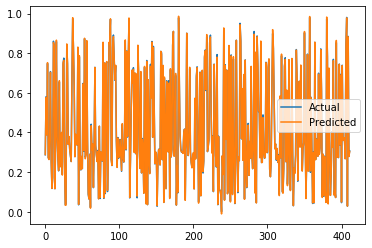

In [13]:
lines = df.plot.line()

In [19]:
#정확도
np.mean(df.Actual - df.Predicted)

-6.248994687775944e-06